In [1]:
#import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

#set exec path
executable_path = {"executable_path": ChromeDriverManager().install()}
browser = Browser("chrome", **executable_path, headless=False)

In [2]:
#visit the Mars NASA news site
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

#optional delay for loading the page
#browser.is_element_present_by_css("div.list_text", wait_time=1)

In [3]:
#import other dependencies and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#get the data into a dataFrame
df = pd.read_html(url)
mars_temp_df = df[0]
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
#check datatypes
mars_temp_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [6]:
#convert terrestrial_date col to datetime
mars_temp_df["terrestrial_date"] = pd.to_datetime(mars_temp_df["terrestrial_date"])
mars_temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

References:
id : The identification number of a single transmission from the Curiosity rover.
terrestrial_date : The date on Earth.
sol : The number of elapsed sols (Martian days) since Curiosity landed on Mars.
ls : The solar longitude.
month : The Martian month.
min_temp : The minimum temperature, in Celsius, of a single Martian day (sol).
pressure : The atmospheric pressure at Curiosity's location.

In [7]:
#How many months exist on Mars?
len(mars_temp_df["month"].unique())

12

In [8]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
num_days = mars_temp_df["sol"].nunique()
num_days

1867

In [9]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

#find mean of temp in each month
avg_temp_per_month = mars_temp_df.groupby("month")["min_temp"].mean()
avg_temp_per_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

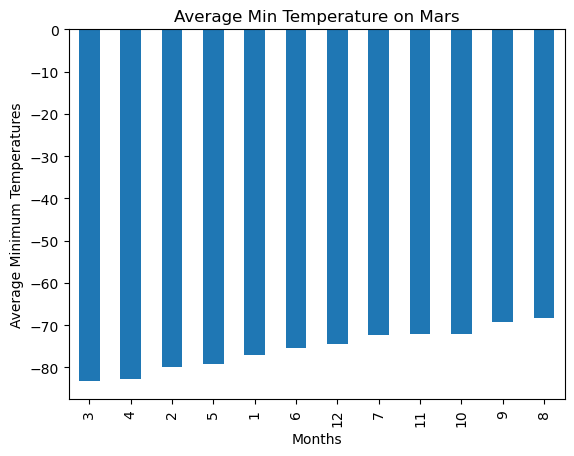

In [10]:
#plot using barplot - I sorted the months so it's easier to spot min and max temps
avg_temp_per_month.sort_values().plot.bar()

plt.xlabel("Months")
plt.ylabel("Average Minimum Temperatures")
plt.title("Average Min Temperature on Mars")
plt.show

The coldest temperature is in Month 3 and  the highest temperature is in Month 8.

In [11]:
#Which months have the lowest and the highest atmospheric pressure on Mars?
#find mean of temp in each month
avg_pressure_per_month = mars_temp_df.groupby("month")["pressure"].mean()
avg_pressure_per_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

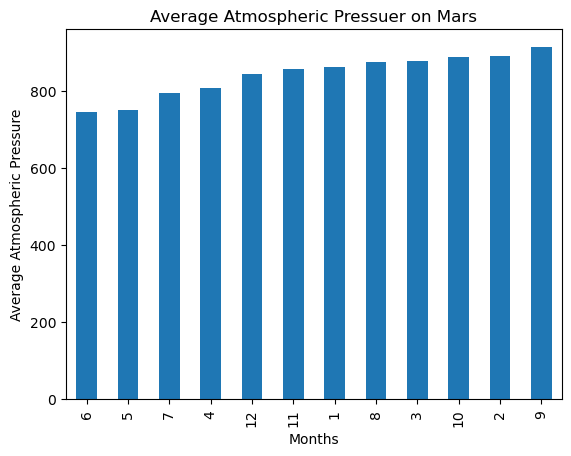

In [12]:
#plot using barplot - I sorted the months so it's easier to spot min and max pressure
avg_pressure_per_month.sort_values().plot.bar()

plt.xlabel("Months")
plt.ylabel("Average Atmospheric Pressure")
plt.title("Average Atmospheric Pressuer on Mars")
plt.show

The lowest temperature is in Month 6, and the highest pressure is in Month 9.

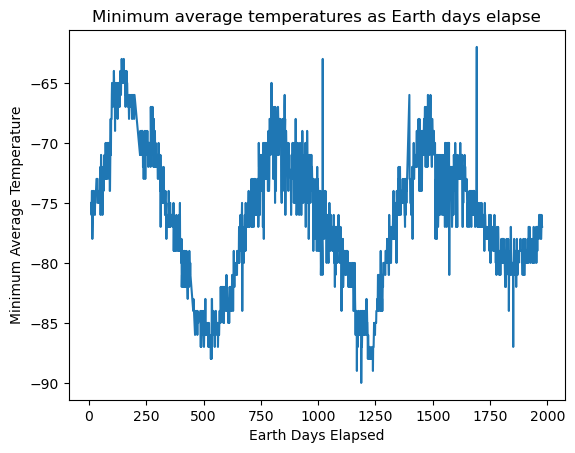

In [13]:
#About how many terrestrial (Earth) days exist in a Martian year?
x = mars_temp_df["sol"]
y = mars_temp_df["min_temp"]

plt.plot(x,y)
plt.xlabel("Earth Days Elapsed")
plt.ylabel("Minimum Average Temperature")
plt.title("Minimum average temperatures as Earth days elapse")
plt.show()

Approximately 750 days - gaging by the min temp at the 500th day and the other min temp around the 1250 day - the difference is approx 750 days.

In [14]:
#export data to csv
mars_temp_df.to_csv("mars_temp.csv")

In [15]:
#quit the browser
browser.quit()